# Homework 6: Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: TOSHAL GHIMIRE

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday December 1st**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

### [15 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 
***

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  One one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Stevey McKnowsNoStats. At various points in your day you catch Stevey making the following mistakes.  In each case, clearly explain to Stevey why his testing setup or conclusion is incorrect. 

**Part A**: Stevey has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Stevey wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \bar{x} = 30$. 

**The null hypothesis should be done on the population mean $\mu$ not the sample mean $\bar{x}$**

**Part B**: After the wonderful explanation you gave him after the previous debacle, Stevey has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \mu < 30$.  

**The hull hypothesis should be the one, that essentially means "has no effect" or the status quo, it is infact $H_1$ that should have $\mu$ < 30. We can use $H_0: \mu = 30$ and find the probality that the P-value is less then the significance level to prove or disprove the null hypothesis**


**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a normalized test-statistic of $z = -1.35$ for the mean age and concludes that since $z = -1.35 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

**we dont compare the Z value with $\alpha$, we use the Z value of -1.35 to find the P-value and compare it (P-value) with the significance level $\alpha$, and based on that we can reject or accept the null hypothesis**

**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

**Steve doesnt quite understand what the p-value and hypothisis testing represent, we cannot simply say, its 3% probability that the null hypothesis is true. Instead we use the p-value to make a conclusion on the null hypotheses. smaller P-value means that their is a the greater evedience against the null hypothsis, and vice verca.**

### [10 points] Problem 2 - Scientists vs. P-Values 
***

Read the following article from **FiveThirtyEight**: [Statisticians Found One Thing They Can Agree On: It's Time to Stop Misusing P-Values](http://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/). In what ways are scientists misusing p-values?  What suggestions are being made to use them properly? 

they are misusing it in a ways where, they assume a p-value can tell you if your hypothesis is correct, also that "p-values can tell you the probability that a result occurred by chance". some suggestions for this misuse, is to move away from the p-values and use instead confidence intervals or Bayesian analyses. 

### [20 points] Problem 3 - Evaluating Pizza Delivery Performance 
***

The manager of a pizza chain with multiple locations likes to keep meticulous data on his pizza deliveries.  The data from more than 1200 deliveries in May 2014 is stored in pizza.csv. Load this data into a Pandas DataFrame. 

In [2]:
df = pd.read_csv('data/pizza.csv')
df.head()


,day,date,time,operator,branch,driver,temperature,bill,pizzas
0,Thursday,01-May-14,33.708636,Laura,East,Bruno,71.433084,58.4,4
1,Thursday,01-May-14,29.382070,Melissa,East,Salvatore,64.952920,26.4,2
2,Thursday,01-May-14,33.580664,Melissa,West,Salvatore,49.113452,58.1,3
3,Thursday,01-May-14,32.505369,Melissa,East,Salvatore,64.872559,35.2,3
4,Thursday,01-May-14,25.493613,Melissa,West,Salvatore,59.630052,38.4,2


**Part A**: The manager's goal is to have an average delivery time across all branches of less than 30 minutes.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

$H_0$ = delevery time average; $\mu = 30$ 

$H_1$ = delevery takes less then 30 minutes; $\mu < 30$ 

from data $\mu_{time}$ = 29.455 

$$ Z = \frac{\bar{x} - \mu }{\frac{std}{\sqrt{n}}}$$

In [3]:
mu = df.time.mean()
std = df.time.std()


zValue = (mu - 30)/(std/np.sqrt(len(df.index)))
print("Z =",zValue,"and its corrsponding pvalue is",stats.norm.cdf(zValue))

z_alpha = stats.norm.ppf(0.05)
print("Z_alpha =",z_alpha,"and its corrsponding pvalue is",stats.norm.cdf(z_alpha))

#compare pvalues using stats.norm.cdf

if(stats.norm.cdf(zValue) < stats.norm.cdf(z_alpha)):
    print("\nThe Pvalue is in the rejection region so" )
    print("Reject the null hypothesis")
else:
    print("\nThe Pvalue is not in the rejection region so" )
    print("Reject the altrnative hypothesis")


Z = -3.17120774749 and its corrsponding pvalue is 0.000759032671812
Z_alpha = -1.64485362695 and its corrsponding pvalue is 0.05

The Pvalue is in the rejection region so
Reject the null hypothesis


since -3.17120774749 < -1.64485362695 we reject the null hypothesis and conclude that there is enough evidence at the 5% significant level that the alternative hypothesis is correct and $\mu$ is less then 30


**Part B**: The manager also has the goal of having an average delivery temperature across all branches of greater than 65F.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

$H_0$ = average temp; $\mu = 65$ 

$H_1$ = average temp is greater then 65; $\mu > 65$ 

from data $\mu_{temp} = 65.274$
$$ Z = \frac{\bar{x} - \mu }{\frac{std}{\sqrt{n}}}$$

In [4]:
df.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas
0,Thursday,01-May-14,33.708636,Laura,East,Bruno,71.433084,58.4,4
1,Thursday,01-May-14,29.382070,Melissa,East,Salvatore,64.952920,26.4,2
2,Thursday,01-May-14,33.580664,Melissa,West,Salvatore,49.113452,58.1,3
3,Thursday,01-May-14,32.505369,Melissa,East,Salvatore,64.872559,35.2,3
4,Thursday,01-May-14,25.493613,Melissa,West,Salvatore,59.630052,38.4,2


In [5]:
mu = df.temperature.mean()
std = df.temperature.std()

zValue = (mu - 65)/(std/np.sqrt(1266))
z_alpha = stats.norm.ppf(0.95)
print("Z =",zValue,"and its corrsponding pvalue is",stats.norm.cdf(zValue))

print("Z_alpha =",z_alpha,"and its corrsponding pvalue is",stats.norm.cdf(z_alpha))


if(stats.norm.cdf(zValue) > stats.norm.cdf(z_alpha)):
    print("\nThe Pvalue is in the rejection region so" )
    print("Reject the null hypothesis")
else:
    print("\nThe Pvalue is not in the rejection region so" )
    print("Reject the altrnative hypothesis")



Z = 1.3820886485 and its corrsponding pvalue is 0.916527758257
Z_alpha = 1.64485362695 and its corrsponding pvalue is 0.95

The Pvalue is not in the rejection region so
Reject the altrnative hypothesis


since the zvalue falls below the rejection region, this means that we cannot reject the null hypothesis

**Part C**: The manager has enough money to give one of his delivery drivers a raise based on good performance. He knows from the data that his two best drivers are Mario and Luigi, but he's not sure if there is evidence that either one is better than the other.  Using delivery time and temperature as the criteria, perform any necessary hypothesis tests at the $\alpha = 0.05$ significance level, to determine if one of the drivers deserves a raise. Be sure to clearly describe your hypotheses and methodology, and show any relevant computations in Python. 

In [6]:
dfMario = df.loc[df["driver"] =="Mario"]
dfLuigi = df.loc[df["driver"] =="Luigi"]

AVGTime_M = dfMario.time.mean()
STD_TIME_M = dfMario.time.std()

AVGTemp_M = dfMario.temperature.mean()
STD_TEMP_M = dfMario.temperature.std()

AVGTime_L = dfLuigi.time.mean()
STD_TIME_L = dfLuigi.time.std()

AVGTemp_L = dfLuigi.temperature.mean()
STD_TEMP_L = dfLuigi.temperature.std()


We will use the same NULL and ALTRNATIVE hypothesis

$H_0$ = delevery time average; $\mu = 30$ 

$H_1$ = delevery takes less then 30 minutes; $\mu < 30$ 

$H_0$ = average temp; $\mu = 65$ 

$H_1$ = average temp is greater then 65; $\mu > 65$ 

In [7]:
#Marios Hypothesis tests
ZvalueTIME_M = (AVGTime_M - 30) / (STD_TIME_M /np.sqrt(len(dfMario.index)))
ZvalueTEMP_M = (AVGTemp_M - 65) / (STD_TEMP_M /np.sqrt(len(dfMario.index)))
print("Z value for Time is",ZvalueTIME_M, "z value of alpha is ",-1*z_alpha)
print("Z value for Temperature is",ZvalueTEMP_M, "z value of alpha is ",z_alpha,"\n")

#luigis Hypothesis tests
ZvalueTIME_L = (AVGTime_L - 30) / (STD_TIME_L /np.sqrt(len(dfLuigi.index)))
ZvalueTEMP_L = (AVGTemp_L - 65) / (STD_TEMP_L /np.sqrt(len(dfLuigi.index)))
print("Z value for Time is",ZvalueTIME_L, "z value of alpha is ",-1*z_alpha)
print("Z value for Temperature is",ZvalueTEMP_L, "z value of alpha is ",z_alpha)


Z value for Time is -2.89288695267 z value of alpha is  -1.64485362695
Z value for Temperature is 0.951139172716 z value of alpha is  1.64485362695 

Z value for Time is -1.93821949118 z value of alpha is  -1.64485362695
Z value for Temperature is 1.70605553965 z value of alpha is  1.64485362695


So i did the same hypothesis tests as part A & B but on just Marios and Luigis deliveries. From the results, i found that both of Luigis critira of temp and time suggests at the 5% significant level to reject the null hypothesis. While for mario only in the time critira we could reject the null hypothesis on a 5% significant level. This means that luigis average delivery time and average temperature was both less then 30 and greater then 65. **With this information I would suggest that Luigi is the better candiate to get a raise**

**Part D**: On the other hand, the manager suspects that Salvatore has been underperforming as a driver.  The manager has a policy that if a pizza takes 40 minutes or longer to be delivered, he has to fork over a free bottle of wine.  This policy is only financially viable for the pizza chain if they have give out free wine on less than 5% of all pizza deliveries.  Perform a hypothesis test at the $\alpha = 0.05$ significance level to determine if there is significant evidence that the proportion of Salvatore's deliveries that take longer than 40 minutes is greater than 5%.  

In [8]:
#information from the data
print("The Precent of TOTAL deliveries that are over 40 minutes is",100*np.sum(df.time > 40)/len(df.index),"%\nThis value is less then 5% so this policy is financially viable\n\n")

dfSalv = df.loc[df.driver == "Salvatore"]
print("The Precent of Salvatores deliveries that are over 40 minutes is",100*np.sum(dfSalv.time > 40)/len(dfSalv.index),"%\nThis value is greater then 5% so this policy is NOT financially viable")


The Precent of TOTAL deliveries that are over 40 minutes is 3.63349131122 %
This value is less then 5% so this policy is financially viable


The Precent of Salvatores deliveries that are over 40 minutes is 5.52325581395 %
This value is greater then 5% so this policy is NOT financially viable


Hypothesis Testing 

$H_0 = 5\%$

$H_1 > 5\%$

In [9]:
percent_40 = 100*np.sum(dfSalv.time > 40)/len(dfSalv.index)
std= dfSalv.time.std()
z_alpha = stats.norm.ppf(0.95)

#not sure what values to use for std and np.sqrt(n)
Zvalue_S =(percent_40 - 5)/( std / np.sqrt(len(dfSalv.index)))

print("Zvalue for salvatars is ",Zvalue_S,"this value is less then the Z_alpha",z_alpha)
print("Thus we cannot reject the null hypothesis\nThis means that salvators deliveries proportion is infact above 5%")


Zvalue for salvatars is  1.52536273895 this value is less then the Z_alpha 1.64485362695
Thus we cannot reject the null hypothesis
This means that salvators deliveries proportion is infact above 5%


### [15 points] Problem 4 - Naps vs Coffee for Memory? 
***

The consumption of coffee to benefit alertness is a common activity practiced by 90% of adults in North America. Often coffee is used to replace the need for sleep. One recent study compares students’ ability to recall memorized information after either the consumption of coffee or a brief nap. A random sample of 24 adults
were randomly divided into two groups and verbally given a list
of 25 words to memorize. During a break, one of the groups took a nap for an hour and a half,
another group stayed awake and were given a coffee an hour prior to testing. Researchers measured the number of words participants were
able to recall following the break. The summary statistics for the two groups are shown below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Nap} & 12 & 15.5 & 3.2 \\ 
\textrm{Coffee} & 12 & 12.25 & 3.1 \\ 
\end{array}
$$

In previous experiments the mean recall measurement was found to be normally distributed. 

**Part A**: Compute a 95% t-confidence interval for the mean recall measurement for participants that took a nap before the test. Do all computations in Python. 

$$ \bar{x} \pm t_{\frac{\alpha}{2},n-1} ~ \frac{S}{\sqrt{n}} $$

In [10]:
n = 12
alpha = 1 - 0.05/2

xbar_nap = 15.5
xbar_coffee = 12.25

std_nap = 3.2
std_coffee = 3.1


tvalue = stats.t.ppf(alpha, n-1)

nap_T_CI = (xbar_nap - tvalue*(std_nap/np.sqrt(n))),(xbar_nap + tvalue*(std_nap/np.sqrt(n)))
print("The T-Confidence interval for mean recall for naping before test is ",nap_T_CI)

The T-Confidence interval for mean recall for naping before test is  (13.46681700054998, 17.53318299945002)


**Part B**: Is there sufficient evidence, at the $\alpha = 0.5$ significance level, to conclude that taking a nap promotes better memory recall that drinking coffee?  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python. 

**I Will do a hypothesis test with the following null and altrnative hypothesis, and find the z value witht he following equation**

$H_0: \mu_{Coffee} = \mu_{nap}: \mu_{Coffee} - \mu_{nap} = 0 $

$H_1: \mu_{Coffee} - \mu_{nap} > 0 $

we will use:

$$z = \frac{(\mu_1 - \mu_2) - C}{\sqrt{\frac{\sigma^2_1}{m} + \frac{\sigma^2_2}{n}}} $$

In [11]:
c = 0
z = ((xbar_coffee - xbar_nap) - c)/ (np.sqrt(((std_coffee**2) / n) + ((std_nap**2)/n)))
print("Z value is ",z," its p value is ",stats.norm.cdf(z))
z_alpha = 0.05

if(stats.norm.cdf(z) < z_alpha):
    print("\nThe Pvalue is in the rejection region so" )
    print("Reject the null hypothesis")
else:
    print("\nThe Pvalue is not in the rejection region so" )
    print("Reject the altrnative hypothesis")


Z value is  -2.52693300826  its p value is  0.005753172435

The Pvalue is in the rejection region so
Reject the null hypothesis


**Part C**: Compute a 95% confidence interval for the standard deviation of memory recall for coffee drinkers. Do all computations in Python.

$$\sqrt{\frac{(n-1)~S^{2}}{X^2_{\frac{\alpha}{2},n-1}}} < \sigma < \sqrt{\frac{(n-1)~S^{2}}{X^2_{1-\frac{\alpha}{2},n-1}}} $$

In [12]:
n = 12
S2 = 3.1 * 3.1
chi_alpha = stats.chi2.ppf((0.05/2),n-1)
chi_oneMinusalpha = stats.chi2.ppf(1-(0.05/2),n-1)

print("The CI for STD is",np.sqrt((n - 1)*S2/chi_alpha),"and", np.sqrt((n - 1)*S2/chi_oneMinusalpha))



The CI for STD is 5.26342185494 and 2.19602496767


### [20 points] Problem 5 - Bad Science for Fun and Profit 
***

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Johnny Nefarious has landed his first data science internship at an online marketing firm.  His primary summer project has been to design and test a new email advertisement for his company's best-selling product. To test his advertisement his supervisors have allowed him to send his ad to 4 targeted customer groups of 50 people every day for a month. 

The effectiveness of online advertising is typically measured by the ad's [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) (CTR), which is defined to be the _proportion_ of users that click on an advertisement. The company's standard email advertisement has a CTR of $0.05$.  Johnny is hoping to land a permanent position at the company when he graduates, so he's **really** motivated to show his supervisors that the CTR of his email advertisement is a (statistically) significant improvement over their previous ad. 

The data from Johnny's summer experiment can be found in email.csv. Load this dataset into Pandas. 

In [13]:

dfEmail = pd.read_csv("data/email.csv")

mu = (dfEmail.Clicked/50).mean()
std = (dfEmail.Clicked/50).std()

print("MU =",mu)
print("STD =",std)


MU = 0.05209677419354832
STD = 0.030690540200561084


**Part A**: State the null and alternate hypotheses that Johnny should test to see if his ad campaign is an improvement over the company's standard mailer with a CTR of $0.05$. 

$H_0 : \mu = 0.05$

$H_1 : \mu > 0.05$

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Johnny to conclude that his ad campaign is an improvement?   

In [14]:
zValue = (mu - 0.05)/(std/np.sqrt(len(dfEmail.index)))
z_alpha = stats.norm.ppf(0.95)
print(zValue)

if(stats.norm.cdf(zValue) > stats.norm.cdf(z_alpha)):
    print("\nThe Pvalue is in the rejection region so" )
    print("Reject the null hypothesis")
else:
    print("\nThe Pvalue is not in the rejection region so" )
    print("Reject the altrnative hypothesis")


0.760778047923

The Pvalue is not in the rejection region so
Reject the altrnative hypothesis


**Part C**: Bummer, Johnny thinks. This is the part where he decides to resort to some questionable science.  Maybe there is a reasonable subset of the data for which his alternative hypothesis is supported?  Can he find it?  Can he come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Johnny cannot modify the original data (e.g. by adding nonexistent clicks to certain groups or days) because his boss will surely notice.  Instead he needs to find a subset of the data for which his hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to his supervisors why his sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

In [15]:
#test: subset = all values included, but the nan dates
dfclean = dfEmail.dropna()

mu = (dfclean.Clicked/50).mean()
std = (dfclean.Clicked/50).std()


print("cleaned MU =",mu)
print("cleaned STD =",std)

zValue = (mu - 0.05)/(std/np.sqrt(len(dfclean.index)))
if(stats.norm.cdf(zValue) > stats.norm.cdf(z_alpha)):
    print("\nThe Pvalue is in the rejection region so" )
    print("Reject the null hypothesis")
else:
    print("\nThe Pvalue is not in the rejection region so" )
    print("Reject the altrnative hypothesis")

#The test still fails, so its not a valid subset

cleaned MU = 0.05238095238095241
cleaned STD = 0.03181165771883441

The Pvalue is not in the rejection region so
Reject the altrnative hypothesis


In [16]:
#Test: subset = Johnny isolates each groups into subsets

group = input("What group would you like to test?");
print("\nYou are testing group",group,"\n")
dfnew = dfEmail.loc[dfEmail.Group == int(group)]

mu = (dfnew.Clicked/50).mean()
std = (dfnew.Clicked/50).std()

print("MU =",mu)
print("STD =",std)

zValue = (mu - 0.05)/(std/np.sqrt(len(dfnew.index)))
print("The Z Value is :",zValue,"its corrsponding p value is",stats.norm.cdf(zValue))

if(stats.norm.cdf(zValue) > stats.norm.cdf(z_alpha)):
    print("\nThe Pvalue is in the rejection region so" )
    print("Reject the null hypothesis")
else:
    print("\nThe Pvalue is not in the rejection region so" )
    print("Reject the altrnative hypothesis")
dfnew.head()

#The test succedes only when group 2 was tested

What group would you like to test?1

You are testing group 1 

MU = 0.04645161290322582
STD = 0.027513437577151786
The Z Value is : -0.718070330817 its corrsponding p value is 0.236356961368

The Pvalue is not in the rejection region so
Reject the altrnative hypothesis


,Group,Date,Sent,Clicked
0,1,NaN,50,1
1,1,Oct 2 2017,50,2
2,1,Oct 3 2017,50,4
3,1,NaN,50,5
4,1,Oct 5 2017,50,1


In [17]:
#test: subset where clicked is greater then 5
dfgready = dfEmail.loc[dfEmail.Clicked > 1]

mu = (dfgready.Clicked/50).mean()
std = (dfgready.Clicked/50).std()

print("MU =",mu)
print("STD =",std)

zValue = (mu - 0.05)/(std/np.sqrt(len(dfgready.index)))
print("The Z Value is :",zValue,"its corrsponding p value is",stats.norm.cdf(zValue))

if(stats.norm.cdf(zValue) > stats.norm.cdf(z_alpha)):
    print("\nThe Pvalue is in the rejection region so" )
    print("Reject the null hypothesis")
else:
    print("\nThe Pvalue is not in the rejection region so" )
    print("Reject the altrnative hypothesis")
dfgready.head()

#test still fails

MU = 0.06382978723404252
STD = 0.02544681922277112
The Z Value is : 5.26921501818 its corrsponding p value is 0.999999931496

The Pvalue is in the rejection region so
Reject the null hypothesis


,Group,Date,Sent,Clicked
1,1,Oct 2 2017,50,2
2,1,Oct 3 2017,50,4
3,1,NaN,50,5
5,1,Oct 6 2017,50,3
6,1,NaN,50,2


I was able to find that a subset in which the nan data points were removed, and where clicked value was greater then 1. those subset results in the null hypothesis being removed

### [20 points] Problem 6 - Simple Linear Regression for Gas Mileage 
***

The data in auto.csv contains information on cars from the 1970s and 1980s. In this exercise you will construct a simple linear regression model for the response variable mpg with horsepower as the feature. Load the data into a Pandas DataFrame.    


In [18]:
dfauto = pd.read_csv("data/auto.csv")
dfauto.head()

,model,year,mpg,cylinders,horsepower,weight
0,chevrolet chevelle malibu,70,18.0,8,130.0,3504.0
1,buick skylark 320,70,15.0,8,165.0,3693.0
2,plymouth satellite,70,18.0,8,150.0,3436.0
3,amc rebel sst,70,16.0,8,150.0,3433.0
4,ford torino,70,17.0,8,140.0,3449.0


**Part A**: Perform a simple linear regression with horsepower as the feature and mpg as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

In [19]:
x = dfauto.horsepower
y = dfauto.mpg
xbar = np.mean(x)
ybar = np.mean(y)

total = len(dfauto.index)
#regression formula from lecture notebook 
'''
def regression(x,y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    numerator = np.sum((x-xbar)*(y-ybar))
    denominator = np.sum((x-xbar)**2) 
    beta = numerator/denominator
    alpha = ybar - beta*xbar
    yhat = alpha + beta*x
    return alpha,beta,yhat

alpha,beta,yhat = regression(x,y)
'''
#altrnativly we could use 
'''
bhat,ahat,rval,pval,stderr = stats.linregress(dfauto.horsepower,dfauto.mpg)
'''
#calcuations by python based on the equation below

numA = np.sum(y)*np.sum(x**2) - np.sum(x)*np.sum(x*y)
demA = 392*np.sum(x**2) - np.sum(x)**2

numB = 392*np.sum(x*y) - np.sum(x)*np.sum(y)
demB = 392*np.sum(x**2) - np.sum(x)**2

alpha = numA/demA
beta = numB/demB


I used the following equation to calcuate my alpha and beta values

![alt text](data/linearregressionequations.png)

Doing the calcuations using np.sum I found: 

$\alpha$ = 39.93586102117046 

$\beta$ = -0.15784473335365337.

$$Y = \alpha + \beta x$$

$$Y = 39.93586102117046 + -0.15784473335365337~ x$$

**Part B**: Make a scatter-plot of the data with horsepower as the feature and mpg as the response and overlay the estimated regression line. 


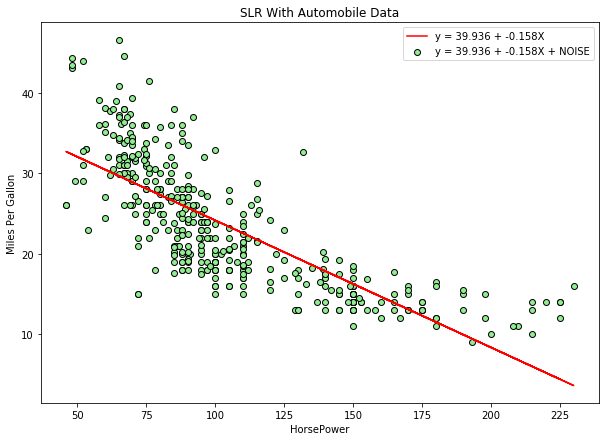

In [40]:

fig, ax = plt.subplots(figsize=(10,7))

x = dfauto.horsepower
y = dfauto.mpg
yhat = alpha+x*beta

plt.scatter(dfauto.horsepower,dfauto.mpg,color="lightgreen",edgecolors="black",label="y = 39.936 + -0.158X + NOISE")
plt.plot(x,yhat,color="red",label="y = 39.936 + -0.158X")
plt.xlabel("HorsePower")
plt.ylabel("Miles Per Gallon")
plt.title("SLR With Automobile Data")
plt.legend()
plt.show()



**Part C**: Is the relationship between horsepower and mpg positive or negative? Justify your response. 

This relationship is a negative relationship beacuse as the horesepower increases mpg decreases

**Part D**: Find a 95% confidence interval for the slope parameter.  Based on this confidence interval, is there sufficient evidence to believe, at the 95% confidence level, that there is a real relationship between horsepower and mpg? 

confidence intervals = $$\hat{\beta} \pm t_{\frac{\alpha}{2},n-2} ~SE(\hat{\beta})$$

In [37]:
betaHAT = beta
t_alphaOVERtwo = stats.t.ppf(.05/2, total-2)

bhat,ahat,rval,pval,stderr = stats.linregress(dfauto.horsepower,dfauto.mpg)

yhat = ahat + bhat*x

SSE = np.sum((y-yhat)**2)
varhat = SSE/(total-2)

sEb = np.sqrt(varhat)/np.sqrt(np.sum((dfauto.horsepower - xbar)**2))

ci = (bhat - t_alphaOVERtwo * sEb , bhat + t_alphaOVERtwo*sEb)

print("The 95% confidence interval for the slope parameter is ",ci)

print(SSE)

def SSE(dfy):
    YY = np.mean(dfy)
    sse = np.sum((dfy - YY)**2)
    return sse

SSE(dfauto.horsepower)

The 95% confidence interval for the slope parameter is  (-0.14517245824295022, -0.17051700846435686)
9385.91587193242


579293.6326530632

In [22]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, yhat)

23.943662938603108

**Part E**: Double-check your result from **Part D** by performing an equivalent hypothesis test.  Be sure to state your null and alternative hypotheses and explain your general methodology.  Do your conclusions agree with those made in **Part D**? 

$H_0 : \beta = 0 $

$H_1 : \beta \ne 0 $

i used the equation for t $$ t =\frac {\beta -c}{standard error} $$

where c = 0 

then i compared that value with the t value of significant level alpha. since its a two tail test we compare both sides to see if t falls within our rejection region

In [23]:
c = 0 
t = (bhat - c)/stderr

AA = stats.t.ppf(0.05,total-2),stats.t.ppf(0.95,total-2)

if (t < AA[0] or t > AA[1]):
    print("T falls within our rejection region.")
    print("Therefore we Reject the null hypothesis")
else:
    print("T is not in our rejection region")
    print("Therefore we Reject the altrnative hypothesis")
    


T falls within our rejection region.
Therefore we Reject the null hypothesis


**Part F**: What gas mileage would your simple linear regression model predict for a car with a horsepower of $97$? 

In [24]:
def predictor(a,b,x):
    y = a + b*x
    return y

print("Simple linear regression would predict for a car with a horsepower of 97 to have mpg of",predictor(ahat,bhat,97))

Simple linear regression would predict for a car with a horsepower of 97 to have mpg of 24.6249218859
